In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
CarSales_Data = pd.read_excel("file_path")
CarSales_Data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
CarSales_Data.shape

(9576, 10)

### Questions to be solved
1. Which type of cars are sold maximum?
2. What is the co-relation between price and mileage?
3. How many cars are registered?
4. Price distribution between registered and non-registered
5. What is the car price distribution based on Engine Value?
6. Which Engine Type of cars useres preferred maximum?
7. Establish a corelation between all features using heatmap
8. Distribution of price

In [4]:
CarSales_Data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [10]:
CarSales_Data.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [11]:
print(len(CarSales_Data.columns))

10


In [45]:
CarSales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [46]:
CarSales_Data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

Now we are calculating the no of duplicated rows

In [51]:
CarSales_Data.duplicated().sum()

113

In [52]:
# To view the duplicated rows
CarSales_Data.loc[CarSales_Data.duplicated(), ]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [67]:
# Removing the duplicated values
CarSales_Data_duplicate = CarSales_Data.copy()
CarSales_Data_duplicate.drop_duplicates(inplace=True)

In [70]:
CarSales_Data_duplicate.duplicated().sum()

0

<AxesSubplot:>

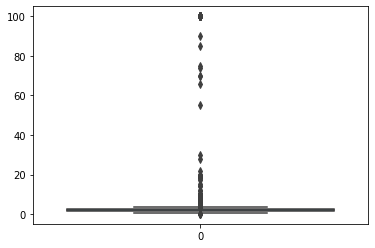

In [71]:
sns.boxplot(data=CarSales_Data_duplicate['engV'])

As we see that there is a lot of outliers hence we use median instead of mean

In [82]:
CarSales_Data_duplicate['engV'] = CarSales_Data_duplicate['engV'].fillna(CarSales_Data_duplicate['engV'].median())
CarSales_Data_duplicate['drive'] = CarSales_Data_duplicate['drive'].fillna(CarSales_Data_duplicate['drive'].mode())[0]

In [119]:
CarSales_Data_duplicate.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [96]:
# Dropping the rows where the car price is 0
CarSales_Data_duplicate["price"][CarSales_Data_duplicate["price"]==0].count()

240

In [113]:
CarSales_Data_duplicate[CarSales_Data_duplicate["price"]==0].index

Int64Index([], dtype='int64')

In [111]:
CarSales_Data_duplicate.drop(CarSales_Data_duplicate[CarSales_Data_duplicate["price"]==0].index, inplace=True)

In [112]:
# Sorting the data according to the price in descending order
CarSales_Data_duplicate.sort_values(by=['price'], ascending=False)

,car,price,body,mileage,engV,engType,registration,year,model,drive
7621,Bentley,547800.000,sedan,0,6.75,Petrol,yes,2016,Mulsanne,full
1611,Bentley,499999.000,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4134,Bentley,449999.000,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4325,Mercedes-Benz,300000.000,sedan,68,6.00,Petrol,yes,2011,S 600,full
5849,Mercedes-Benz,300000.000,other,37,5.00,Petrol,yes,2012,G 500,full
...,...,...,...,...,...,...,...,...,...,...
4905,VAZ,389.025,vagon,1,1.30,Petrol,yes,1983,2102,full
8252,ZAZ,370.500,sedan,3,1.10,Petrol,yes,1989,968,full
7566,Moskvich-AZLK,350.000,sedan,100,2.00,Other,yes,1985,2140,full
6457,Moskvich-AZLK,280.000,sedan,99,1.50,Petrol,yes,1976,2140,full


In [156]:
# CarSales_Data_duplicate['car'].value_counts().sort_values(ascending=False).head()

MostCars_Sold = CarSales_Data_duplicate.groupby(['car'])['car'].count().sort_values(ascending=False).head()
MostCars_Sold

car
Volkswagen       899
Mercedes-Benz    831
BMW              661
Toyota           516
VAZ              479
Name: car, dtype: int64

In [117]:
CarSales_Data_duplicate.groupby(['body'])['body'].value_counts().sort_values(ascending=False).head()

body       body     
sedan      sedan        3564
crossover  crossover    1929
hatch      hatch        1232
van        van           998
other      other         803
Name: body, dtype: int64

In [174]:
CarSales_Data_duplicate["car"].value_counts().iloc[:5].index

Index(['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ'], dtype='object')

<AxesSubplot:xlabel='car', ylabel='count'>

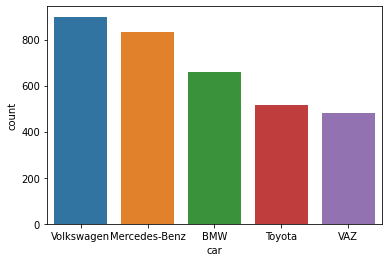

In [165]:
sns.countplot(x="car", data=CarSales_Data_duplicate, order=CarSales_Data_duplicate["car"].value_counts().iloc[:5].index)

<AxesSubplot:xlabel='body', ylabel='count'>

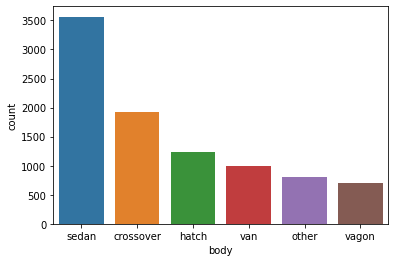

In [178]:
sns.countplot(x="body", data=CarSales_Data_duplicate, order=CarSales_Data_duplicate["body"].value_counts().iloc[:].index)

It is seen that the most sold car company is Volkswagen and the the body type is Sedan

In [140]:
CarSales_Data_duplicate['price'].corr(CarSales_Data_duplicate['mileage'])

-0.3272147185610361

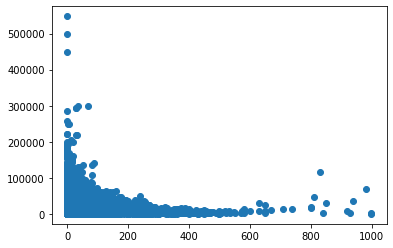

In [143]:
plt.scatter(y=CarSales_Data_duplicate['price'], x=CarSales_Data_duplicate['mileage'])
plt.show()

It has been observed that there is a negative corelation between price and mileage

In [198]:
Registerd_Cars = CarSales_Data_duplicate[CarSales_Data_duplicate["registration"] == "yes"]["registration"].count()
NonRegistered_Cars = CarSales_Data_duplicate[CarSales_Data_duplicate["registration"] == "no"]["registration"].count()
Registerd_Cars, NonRegistered_Cars

(8669, 554)

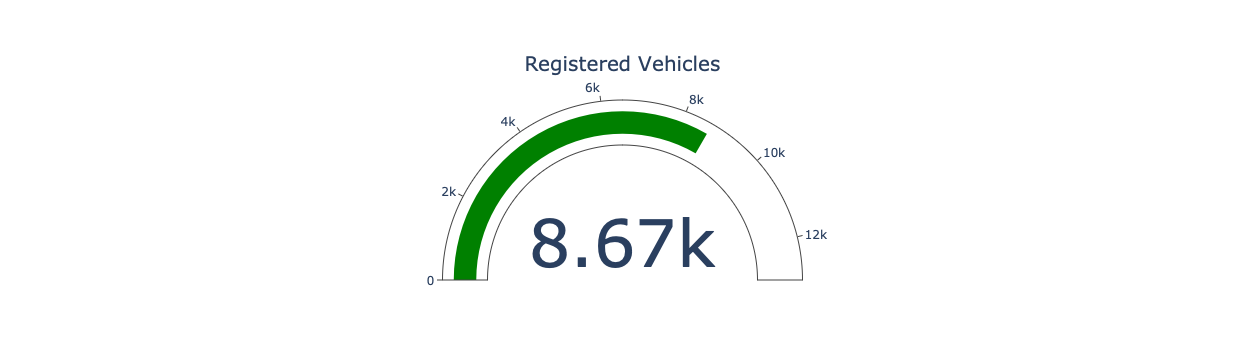

In [203]:
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = Registerd_Cars,
    title = {'text': "Registered Vehicles"}))

fig.show()

It has been observed that out of 9223 vehciles 8669 vehicles have ben registered

In [204]:
CarSales_Data_duplicate.groupby(["registration", "body"])["price"].mean()

registration  body     
no            crossover     7951.310345
              hatch         2563.750000
              other         3936.687500
              sedan         3938.627049
              vagon         3124.428571
              van           3488.457143
yes           crossover    30823.920366
              hatch         8765.219078
              other        20306.873075
              sedan        12826.420380
              vagon        10279.830563
              van          10953.924169
Name: price, dtype: float64

<AxesSubplot:xlabel='registration', ylabel='price'>

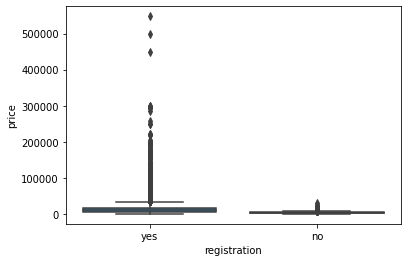

In [207]:
sns.boxplot(x="registration", y="price", data=CarSales_Data_duplicate)

From the above graph it is visible that the cost variation of cars which are registered and which are not registered

In [208]:
CarSales_Data_duplicate.groupby(["body", "engV"])["price"].mean()

body       engV 
crossover  1.00      7700.000000
           1.20     13727.695993
           1.30      7100.000000
           1.40     14987.500000
           1.50     14880.744543
                        ...     
van        66.00    14999.000000
           74.00     7500.000000
           75.00    11350.000000
           90.00     6100.000000
           99.99     5675.000000
Name: price, Length: 293, dtype: float64

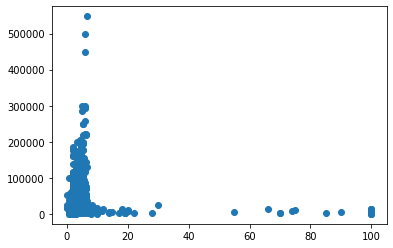

In [213]:
plt.scatter(x="engV", y="price", data=CarSales_Data_duplicate)
plt.show()

Except for few outliers, it is observed that the range of car price between 0 to 150000 having the range of engine value between 0 to 6.

In [264]:
MaxEngine_type = CarSales_Data_duplicate.groupby(["engType"])["engType"].count().sort_values(ascending=False).head(5)
MaxEngine_type

engType
Petrol    4260
Diesel    2821
Gas       1692
Other      450
Name: engType, dtype: int64

<AxesSubplot:xlabel='engType', ylabel='count'>

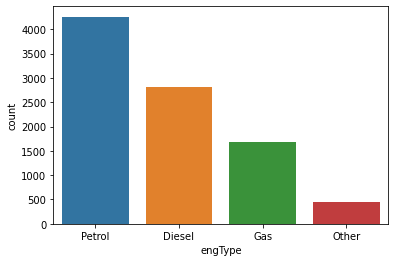

In [268]:
sns.countplot(x='engType', data=CarSales_Data_duplicate, order=CarSales_Data_duplicate["engType"].value_counts().iloc[:].index)

The preferred engine type is Petrol, followed by Disel

In [262]:
Corealted_Data = CarSales_Data_duplicate.corr()
Corealted_Data

,price,mileage,engV,year
price,1.000000,-0.327215,0.050786,0.391502
mileage,-0.327215,1.000000,0.051085,-0.489311
engV,0.050786,0.051085,1.000000,-0.046806
year,0.391502,-0.489311,-0.046806,1.000000


<AxesSubplot:>

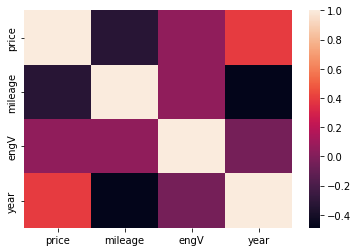

In [263]:
sns.heatmap(Corealted_Data)

From the the heat map we are able to get a grasp that mileage and manufacture year, mileage and price and __neagtively corelated__ where as price and year are __positively corelated__

<AxesSubplot:xlabel='price'>

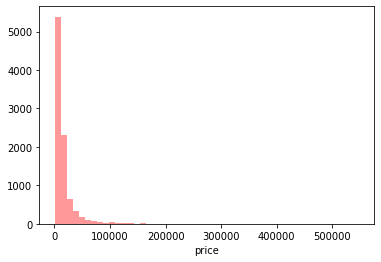

In [274]:
sns.distplot(CarSales_Data_duplicate['price'], color='r', kde=False)

From the above histogram we can view that the it is positvely skewed and mostly varies between __0__ and __80000__